In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import sklearn.metrics 
from sklearn.model_selection import train_test_split

In [35]:
df=pd.read_csv(r'C:\Users\Dell\Desktop\AQI_DATA.csv')  #Reading data from file

In [7]:
df.dropna() #Dropping null values

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833
...,...,...,...,...,...,...,...
16690,54,1,34,5,54,37.5516,-77.3285
16691,71,1,39,1,71,49.0650,18.9219
16692,71,1,39,1,71,36.3385,-88.8513
16693,50,1,20,5,50,48.7786,2.2906


Performing EDA

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AQI Value        16695 non-null  int64  
 1   CO AQI Value     16695 non-null  int64  
 2   Ozone AQI Value  16695 non-null  int64  
 3   NO2 AQI Value    16695 non-null  int64  
 4   PM2.5 AQI Value  16695 non-null  int64  
 5   lat              16695 non-null  float64
 6   lng              16695 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 913.1 KB


In [6]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [12]:
corr=df.corr()
corr

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
AQI Value,1.000000,0.458523,0.327956,0.308858,0.980360,-0.099554,0.150662
CO AQI Value,0.458523,1.000000,0.039752,0.399566,0.458846,-0.076412,0.002410
Ozone AQI Value,0.327956,0.039752,1.000000,-0.251169,0.233031,0.249740,0.318965
NO2 AQI Value,0.308858,0.399566,-0.251169,1.000000,0.341455,0.040666,-0.290813
PM2.5 AQI Value,0.980360,0.458846,0.233031,0.341455,1.000000,-0.125997,0.113621
lat,-0.099554,-0.076412,0.249740,0.040666,-0.125997,1.000000,-0.027530
lng,0.150662,0.002410,0.318965,-0.290813,0.113621,-0.027530,1.000000


Feature Selection

In [13]:
X=df[['CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']]
Y=df['AQI Value']

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

Model Training & Testing

In [17]:
model=linear_model.LinearRegression()

In [18]:
model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
y_predict=model.predict(X_test)

In [41]:
print("Mean Squared Error (MSE) : ", mean_squared_error(Y_test,y_predict))
print("Root Mean Squared Error (RMSE) : ", np.sqrt(mean_squared_error(Y_test,y_predict)))

Mean Squared Error (MSE) :  56.18031037319791
Root Mean Squared Error (RMSE) :  7.495352584982104


In [21]:
print("R2 Score : ",r2_score(Y_test,y_predict))

R2 Score :  0.9693962061780651


Result Plotting

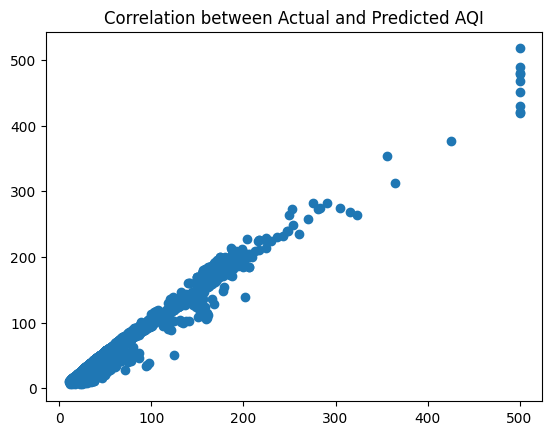

In [43]:
plt.scatter(Y_test,y_predict)
plt.title('Correlation between Actual and Predicted AQI')
plt.show()

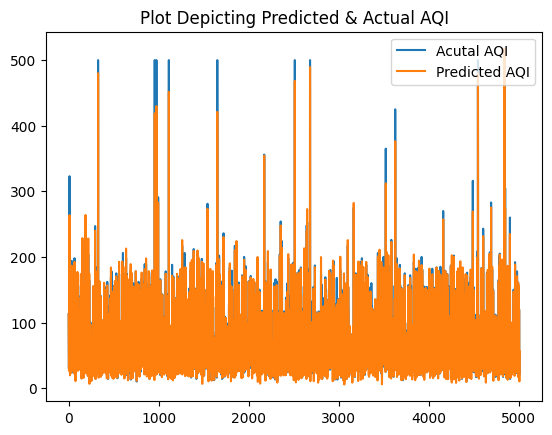

In [44]:
plt.plot(Y_test.values,label='Acutal AQI')
plt.plot(y_predict,label='Predicted AQI')
plt.title('Plot Depicting Predicted & Actual AQI')
plt.legend()

It is observed from the given plots that Predicted AQI overlaps with the Actual AQI. Hence, the model is Accurate.